In [1]:
#Cars4U.py
#Author: Kyle Larson
#Project for Analyzing Used Cars Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,18)})
used_cars_data=pd.read_csv("used_cars_data.csv")

In [2]:
used_cars_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
used_cars_data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [11]:
#Look at the mileage on that car! 6.5 million km is 4.03891 million miles
print("Max mileage (km):")
print(used_cars_data['Kilometers_Driven'].max())
print('\n')
maxmiles=used_cars_data['Kilometers_Driven'].idxmax()
print(used_cars_data.iloc[maxmiles])

Max mileage (km):
6500000


S.No.                                     2328
Name                 BMW X5 xDrive 30d M Sport
Location                               Chennai
Year                                      2017
Kilometers_Driven                      6500000
Fuel_Type                               Diesel
Transmission                         Automatic
Owner_Type                               First
Mileage                             15.97 kmpl
Engine                                 2993 CC
Power                                  258 bhp
Seats                                        5
New_Price                                  NaN
Price                                       65
Name: 2328, dtype: object


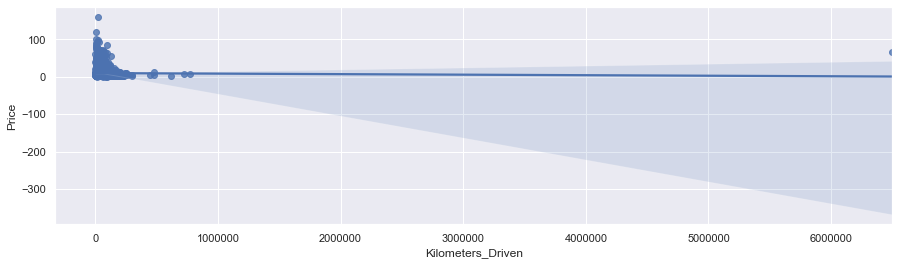

In [4]:
#Km vs Price
plt.figure(figsize=(15,4))
sns.regplot(data=used_cars_data, x="Kilometers_Driven", y="Price" )

In [5]:
#Outlier Cutoffs
quantitative=['S.No.','Year','Kilometers_Driven','Seats','Price']
seventy_fifth=[5439.000000,2016.000000,7.300000e+04,5.000000,9.950000]
twenty_fifth=[1813.000000,2011.000000,3.400000e+04,5.000000,3.500000]
cutoffs, upperco, lowerco =[],[],[]
for i in range(len(seventy_fifth)): cutoffs.append( (seventy_fifth[i] - twenty_fifth[i])*1.5 ) 
for i in range(len(seventy_fifth)): upperco.append( seventy_fifth[i] + cutoffs[i] ) 
for i in range(len(seventy_fifth)): lowerco.append( twenty_fifth[i] - cutoffs[i] ) 

print("Outliers fall below:")

print(lowerco)
print("Outliers extend above:")
print(upperco)

print(quantitative)
#you will see that though it doesn't make sense to cal outlier by S.No 
#outliers exist for Year, Kilometers Driven, Seats and Price 

Outliers fall below:
[-3626.0, 2003.5, -24500.0, 5.0, -6.174999999999999]
Outliers extend above:
[10878.0, 2023.5, 131500.0, 5.0, 19.625]
['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price']


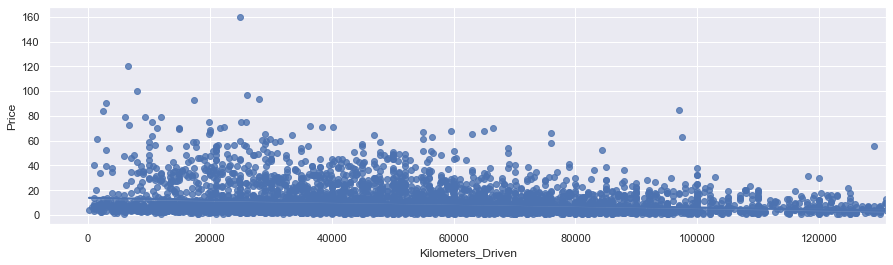

In [13]:
#getting rid of the outliers:

outliers, used_cars_minus_outliers  = [x for _, x in used_cars_data.groupby(used_cars_data['Kilometers_Driven'] < 131500)]

#plotting:
plt.figure(figsize=(15,4))
sns.regplot(data=used_cars_minus_outliers, x="Kilometers_Driven", y="Price")
# it seems that it would be appropriate to apply a relatonship to all cars under 131500 
# for the reason that the rest are outliers

In [7]:
#Year vs Price

In [8]:
#Mileage vs Price

In [9]:
#Power vs Price

In [10]:
#Seats vs Price